# MLB Payroll Efficiency Analysis: 2025 Season

## Research Question
Which Major League Baseball teams generated the most wins per dollar of payroll spending in 2025? 
This analysis explores the relationship between team spending and on-field performance to identify 
organizations that maximize competitive value within their budget constraints.

## Why This Matters
In baseball operations, understanding payroll efficiency helps teams make strategic decisions about:
- Free agent spending vs. player development investment
- Competitive windows and rebuild timing
- Market size constraints and small-market strategies
- Front office performance evaluation

## Methodology Overview
1. Collect 2025 team payroll data and win-loss records
2. Calculate efficiency metrics (Wins per $Million spent)
3. Identify overperforming and underperforming organizations
4. Analyze patterns by market size and division
5. Generate actionable insights for front office decision-making

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

print("Libraries imported!")

Libraries imported!


In [2]:
standings2025 = pd.read_csv(r"C:\Users\cmray\Analytics\2025_mlb_payroll_standings-cleaned.csv")
print(standings2025.head(5))

   team_id              team_name  total_payroll  active_payroll  \
0        1      Milwaukee Brewers      137618720        86638816   
1        2  Philadelphia Phillies      293240191       226763871   
2        3      Toronto Blue Jays      255230406       160405569   
3        4       New York Yankees      304091683       198430719   
4        5    Los Angeles Dodgers      350024106       268807958   

   injured_payroll  avg_age  wins  losses  runs_scored_allowed  runs_allowed  \
0         15805635     27.4    97      65                  5.0           3.9   
1         55474994     30.4    96      66                  4.8           4.0   
2         70568356     28.9    94      68                  4.9           4.5   
3         46660521     29.7    94      68                  5.2           4.2   
4         48883969     29.5    93      69                  5.1           4.2   

   run_differential  strength_o_schedule  simple_rating_system pyth_w_l  \
0               1.1                

In [3]:
standings2025['wins_per_million'] = standings2025['wins']/(standings2025['total_payroll']/1000000)
print(standings2025['wins_per_million'])

0     0.704846
1     0.327377
2     0.368295
3     0.309117
4     0.265696
5     0.429866
6     0.543490
7     0.403361
8     0.437005
9     0.877666
10    0.374774
11    0.552232
12    0.242475
13    0.697265
14    0.613634
15    0.453624
16    0.357574
17    0.450896
18    1.165284
19    0.594727
20    0.868782
21    0.969583
22    0.345104
23    0.472973
24    0.345455
25    0.841000
26    0.539912
27    0.602927
28    0.750368
29    0.337716
Name: wins_per_million, dtype: float64


In [4]:
print(standings2025[['team_id','team_name', 'total_payroll','wins_per_million']].sort_values(by='wins_per_million', ascending=False))

    team_id              team_name  total_payroll  wins_per_million
18       19          Miami Marlins       67794627          1.165284
21       22              Athletics       78384241          0.969583
9        10    Cleveland Guardians      100265946          0.877666
20       21         Tampa Bay Rays       88629788          0.868782
25       26     Pittsburgh Pirates       84423338          0.841000
28       29      Chicago White Sox       79960763          0.750368
0         1      Milwaukee Brewers      137618720          0.704846
13       14        Cincinnati Reds      119036486          0.697265
14       15     Kansas City Royals      133630058          0.613634
27       28   Washington Nationals      109465924          0.602927
19       20    St. Louis Cardinals      131152698          0.594727
11       12         Detroit Tigers      157542361          0.552232
6         7       Seattle Mariners      165596493          0.543490
26       27        Minnesota Twins      12965073

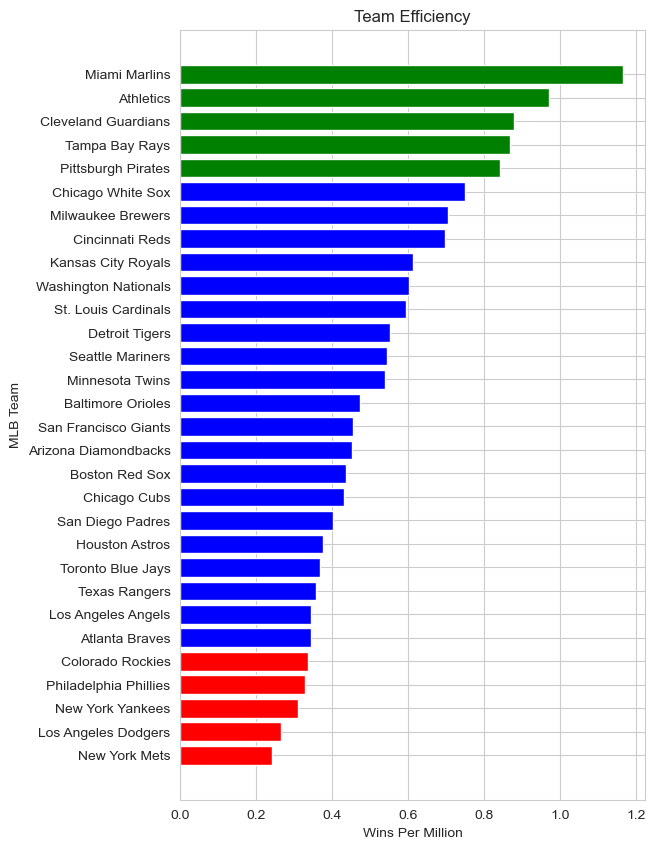

In [9]:
sorted_teams = standings2025[['team_id','team_name', 'total_payroll','wins_per_million']].sort_values(by='wins_per_million', ascending=True)
colors = ['red']*5 + ['blue']*20 + ['green']*5
plt.figure(figsize=(6,10))
plt.barh(sorted_teams['team_name'], sorted_teams['wins_per_million'], color=colors)
plt.xlabel('Wins Per Million')
plt.ylabel('MLB Team')
plt.title('Team Efficiency')
plt.show()

In [10]:
test_df = sorted_teams[['team_name', 'wins_per_million']].head(5)
print(test_df)

                team_name  wins_per_million
12          New York Mets          0.242475
4     Los Angeles Dodgers          0.265696
3        New York Yankees          0.309117
1   Philadelphia Phillies          0.327377
29       Colorado Rockies          0.337716
